# Importações

In [44]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

from constants import DIR_OUTPUT_TABLES, DIR_OUTPUT_GRAPHS, DIR_OTHERS_DATA

# Carregando arquivos csv

## Tabela relacionando Games vs. Adaptações
(output de game_adaptation.ipynb)

In [45]:
df_game_adaptation = pd.read_csv(os.path.join(DIR_OUTPUT_TABLES, 'game_adaptation.csv'),)
df_game_adaptation['ReleaseDate'] = pd.to_datetime(df_game_adaptation['ReleaseDate'], format='%Y-%m-%d', errors='coerce').dt.date
df_game_adaptation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   GameTitle                              86 non-null     object 
 1   MaxHistoricalPeak                      86 non-null     int64  
 2   AdaptReleasePeak                       86 non-null     int64  
 3   AdaptReleaseAbsoluteGrowth             86 non-null     float64
 4   AdaptReleasePercentualGrowth           86 non-null     float64
 5   PreviousYearPeak                       82 non-null     float64
 6   PreviousYearAbsoluteGrowth             81 non-null     float64
 7   PreviousYearPercentualGrowth           81 non-null     float64
 8   NextMonthPeak                          85 non-null     float64
 9   NextMonthAbsoluteGrowth                85 non-null     float64
 10  NextMonthPercentualGrowth              85 non-null     float64
 11  NextMont

## Tabela relacionando Games vs. Adaptações
(somente jogos com crescimentos estatisticamente significativos, segundo MannWhitney)

In [46]:
stat_relevant = pd.read_csv(os.path.join(DIR_OTHERS_DATA, 'estat_relevantes.csv'),)
df_game_adaptation_relevant = df_game_adaptation[df_game_adaptation['GameTitle'].isin(stat_relevant['gameTitle'])].copy()
df_game_adaptation_relevant.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 5 to 82
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   GameTitle                              25 non-null     object 
 1   MaxHistoricalPeak                      25 non-null     int64  
 2   AdaptReleasePeak                       25 non-null     int64  
 3   AdaptReleaseAbsoluteGrowth             25 non-null     float64
 4   AdaptReleasePercentualGrowth           25 non-null     float64
 5   PreviousYearPeak                       24 non-null     float64
 6   PreviousYearAbsoluteGrowth             24 non-null     float64
 7   PreviousYearPercentualGrowth           24 non-null     float64
 8   NextMonthPeak                          25 non-null     float64
 9   NextMonthAbsoluteGrowth                25 non-null     float64
 10  NextMonthPercentualGrowth              25 non-null     float64
 11  NextMonthPrev

# Análise dos dados

## Percentual máximo do crescimento por jogo

### Função para adicionar nova coluna HistoricalPeakRatio

In [47]:
def add_percentual_growth(df: pd.DataFrame) -> pd.DataFrame:
    """
    Adiciona a coluna de crescimento percentual de jogadores.
    """
    # Calcula a razão AdaptReleasePeak / MaxHistoricalPeak e adiciona a coluna HistoricalPeakRatio
    df['HistoricalPeakRatio'] = (
        df['AdaptReleasePeak'] 
        / df['MaxHistoricalPeak']
    )
    return df

df_game_adaptation = add_percentual_growth(df_game_adaptation)
df_game_adaptation_relevant = add_percentual_growth(df_game_adaptation_relevant)

### Função para plotar barplot com o HistoricalPeakRatio de cada jogo

In [48]:
def barplot_percentMaxGrowth(
    initial_df: pd.DataFrame, 
    graph_title: str, 
    output_file: str, 
    ylabel_size: int = 6,
    only_greater_than_100: bool = False
) -> None:
    
    if only_greater_than_100:
        df = initial_df[initial_df['HistoricalPeakRatio'] > 1.0].copy()
        graph_title += ' (somente crescimento maior que 100%)'
    else:
        df = initial_df.copy()
        
    # agrega o valor máximo por jogo
    max_growth = (
        df
        .groupby('GameTitle')['HistoricalPeakRatio']
        .max()
        .reset_index()
        .sort_values('HistoricalPeakRatio', ascending=False)
    )

    plt.figure(figsize=(10,8))
    ax = sns.barplot(
        y='GameTitle',
        x='HistoricalPeakRatio',
        data=max_growth,
        palette='viridis'
    )
    plt.xlabel('Crescimento relativo ao pico histórico')
    plt.ylabel('Jogo')
    plt.title(graph_title)

    # reduz o tamanho da fonte dos rótulos de y
    ax.tick_params(axis='y', labelsize=ylabel_size)

    # adiciona linha vertical em x=1.0
    ax.axvline(x=1.0, color='red', linestyle='--', linewidth=1)

    plt.tight_layout()
    
    # Salvar gráfico em arquivo
    output_path = os.path.join(DIR_OUTPUT_GRAPHS, output_file)
    plt.savefig(
        output_path, 
        dpi=300, 
        bbox_inches='tight')
    
    plt.show()

### Barplot (todos os jogos)

/tmp/ipykernel_281819/2050072027.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


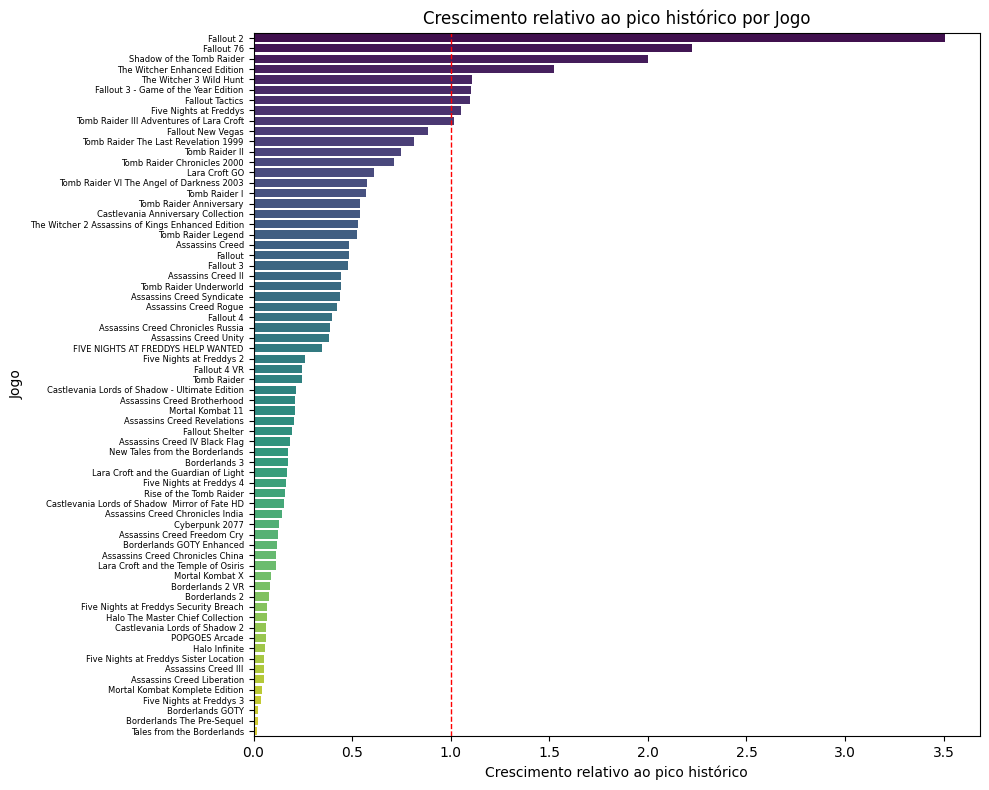

In [49]:
barplot_percentMaxGrowth(
    df_game_adaptation,
    graph_title='Crescimento relativo ao pico histórico por Jogo',
    output_file='barplot_historicalPeakRatio_todos.png',
    only_greater_than_100=False
)

### Barplot (somente jogos com crescimento maior que 100%)

/tmp/ipykernel_281819/2050072027.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


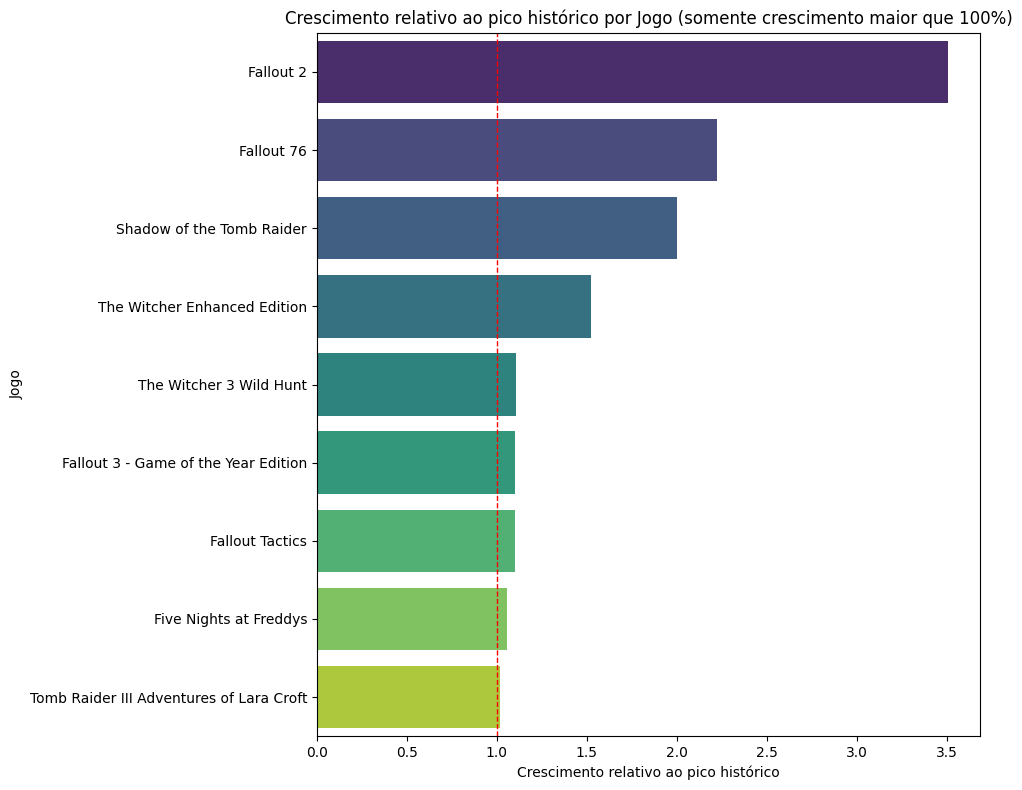

In [50]:
barplot_percentMaxGrowth(
    df_game_adaptation,
    graph_title='Crescimento relativo ao pico histórico por Jogo',
    output_file='barplot_historicalPeakRatio_maiorQue100.png',
    ylabel_size=10,
    only_greater_than_100=True
)

### Barplot (somente jogos com crescimentos estatisticamente significativos)
segundo MannWhitney

/tmp/ipykernel_281819/2050072027.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


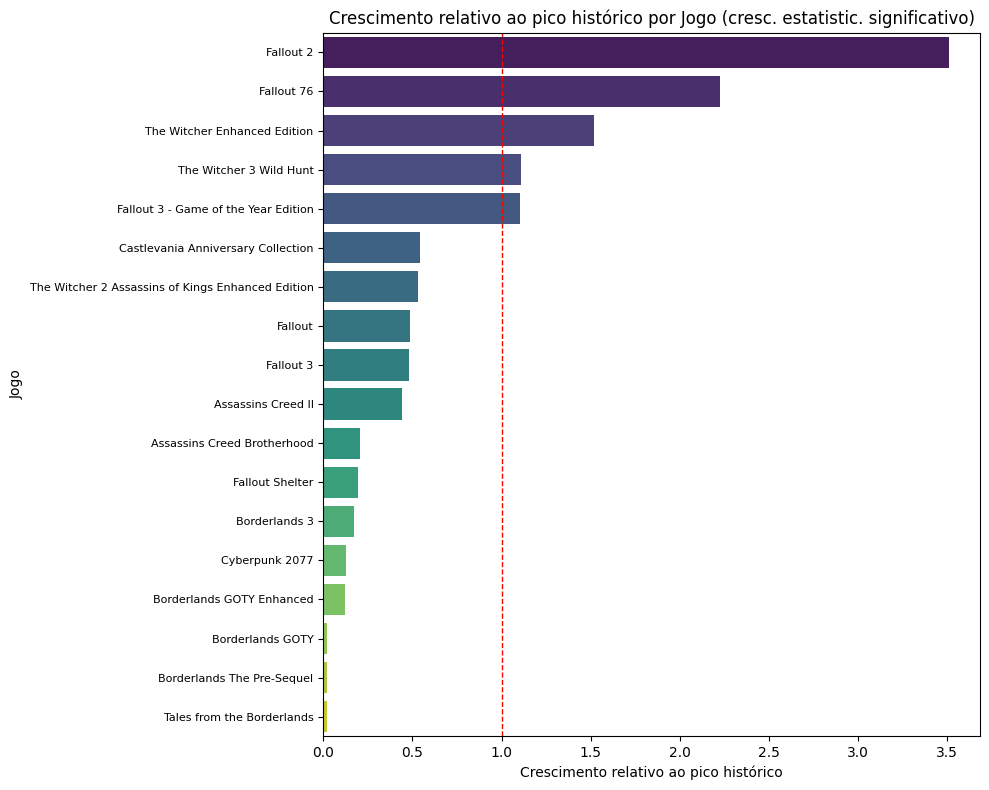

In [51]:
df_game_adaptation = add_percentual_growth(df_game_adaptation)
barplot_percentMaxGrowth(
    df_game_adaptation_relevant,
    graph_title='Crescimento relativo ao pico histórico por Jogo (cresc. estatistic. significativo)',
    output_file='barplot_historicalPeakRatio_jogosSignificativos.png',
    ylabel_size=8,
    only_greater_than_100=False
)